In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
model_names = ['MobileNetV2', 'VGG16', 'DenseNet121', 'EfficientNetB0', 'ResNet50']

In [4]:
datasets = ['cifar10', 'cifar100']

In [5]:
def clean_params_optimizer(opt):
    """
    Extracts the optimizer name from a string representation of an optimizer class.

    Args:
        opt (str): A string representation of an optimizer class.

    Returns:
        str: The name of the optimizer.
    """
    opt = str(opt)
    opt = opt.split('optimizers.')[1]
    return opt.split('.')[0]


# RandomSampler

CIFAR10

In [6]:
df = []   # list of pandas dataframes containing results of RandomSampler experiments

In [7]:
base_path = '/content/drive/MyDrive/hyperparameter analysis/hyperparameter_tuning_studies/RandomSampler'

In [8]:
for dataset in datasets:
    for model_name in model_names:
        tmp = pd.read_csv(os.path.join(base_path, "{}_{}_study.csv".format(dataset, model_name)), converters={'params_optimizer':clean_params_optimizer})
        tmp['dataset'] = dataset
        tmp['model'] = model_name
        df.append(tmp)
        del tmp

In [9]:
df = pd.concat(df)
df.reset_index(drop=True, inplace=True)
df.head()

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_dropout_rate,params_epochs,params_learning_rate,params_optimizer,state,model_history,val_metrics,dataset,model
0,0,0.476131,2023-08-18 16:19:58.271730,2023-08-18 16:23:45.585863,0 days 00:03:47.314133,64,0.143635,10,0.000603,sgd,COMPLETE,"{'loss': [2.461721420288086, 2.215304374694824...","{'model_val_accuracy': 0.37950000166893005, 'm...",cifar10,MobileNetV2
1,1,0.649405,2023-08-18 16:23:45.587242,2023-08-18 16:50:25.123694,0 days 00:26:39.536452,32,0.064521,50,0.000711,sgd,COMPLETE,"{'loss': [1.715989351272583, 1.62648606300354,...","{'model_val_accuracy': 0.5892999768257141, 'mo...",cifar10,MobileNetV2
2,2,0.660277,2023-08-18 16:50:25.125036,2023-08-18 16:59:44.835198,0 days 00:09:19.710162,96,0.258111,30,0.000192,sgd,COMPLETE,"{'loss': [1.5434991121292114, 0.97703492641448...","{'model_val_accuracy': 0.6051999926567078, 'mo...",cifar10,MobileNetV2
3,3,0.641584,2023-08-18 16:59:44.836591,2023-08-18 17:06:25.868555,0 days 00:06:41.031964,96,0.157986,20,0.000148,adam,COMPLETE,"{'loss': [0.7949205636978149, 0.71736830472946...","{'model_val_accuracy': 0.5863000154495239, 'mo...",cifar10,MobileNetV2
4,4,0.654937,2023-08-18 17:06:25.869942,2023-08-18 17:09:27.518832,0 days 00:03:01.648890,160,0.164017,10,0.000519,sgd,COMPLETE,"{'loss': [1.3746004104614258, 0.65624898672103...","{'model_val_accuracy': 0.593999981880188, 'mod...",cifar10,MobileNetV2


In [10]:
# rename value column to objective

df.rename({'value':'objective'}, axis=1, inplace=True)

In [11]:
# Convert columns to appropriate datetime datatype

for col in ['datetime_start', 'datetime_complete']:
   df[col] = pd.to_datetime(df[col])

In [12]:
df['train_duration (minutes)'] = np.round(((df['datetime_complete'] - df['datetime_start']).dt.seconds) /60, 2)

In [13]:
cols_to_drop = ['number', 'datetime_start', 'datetime_complete', 'duration', 'state']

In [14]:
df.drop(columns=cols_to_drop, inplace=True)

In [15]:
df.dtypes

objective                   float64
params_batch_size             int64
params_dropout_rate         float64
params_epochs                 int64
params_learning_rate        float64
params_optimizer             object
model_history                object
val_metrics                  object
dataset                      object
model                        object
train_duration (minutes)    float64
dtype: object

In [16]:
df.head()

,objective,params_batch_size,params_dropout_rate,params_epochs,params_learning_rate,params_optimizer,model_history,val_metrics,dataset,model,train_duration (minutes)
0,0.476131,64,0.143635,10,0.000603,sgd,"{'loss': [2.461721420288086, 2.215304374694824...","{'model_val_accuracy': 0.37950000166893005, 'm...",cifar10,MobileNetV2,3.78
1,0.649405,32,0.064521,50,0.000711,sgd,"{'loss': [1.715989351272583, 1.62648606300354,...","{'model_val_accuracy': 0.5892999768257141, 'mo...",cifar10,MobileNetV2,26.65
2,0.660277,96,0.258111,30,0.000192,sgd,"{'loss': [1.5434991121292114, 0.97703492641448...","{'model_val_accuracy': 0.6051999926567078, 'mo...",cifar10,MobileNetV2,9.32
3,0.641584,96,0.157986,20,0.000148,adam,"{'loss': [0.7949205636978149, 0.71736830472946...","{'model_val_accuracy': 0.5863000154495239, 'mo...",cifar10,MobileNetV2,6.68
4,0.654937,160,0.164017,10,0.000519,sgd,"{'loss': [1.3746004104614258, 0.65624898672103...","{'model_val_accuracy': 0.593999981880188, 'mod...",cifar10,MobileNetV2,3.02


In [18]:
def extract_metrics(val_metrics):
    """
    Extracts metrics from a dictionary-like string representation.

    Parameters:
    val_metrics (str): String representation of a dictionary containing validation metrics.

    Returns:
    pd.Series: A pandas Series containing extracted metrics with indices.
    """
    val_metrics = ast.literal_eval(val_metrics)  # Convert the string to a dictionary
    indices = [key.split('model_')[1] for key in val_metrics.keys()]  # Extract indices from keys
    return pd.Series(val_metrics.values(), index=indices)  # Create a Series with metrics and indices

In [19]:
df['model_history'] = df.model_history.apply(lambda x: ast.literal_eval(x))

In [20]:
extract_metrics(df['val_metrics'][0])

val_accuracy     0.379500
val_f1           0.374127
val_precision    0.412290
val_recall       0.379500
val_auc          0.835239
dtype: float64

In [21]:
new_columns = df['val_metrics'].apply(extract_metrics)
df = pd.concat([df, new_columns], axis=1)
df.drop('val_metrics', axis=1, inplace=True)

In [22]:
df.sample()

,objective,params_batch_size,params_dropout_rate,params_epochs,params_learning_rate,params_optimizer,model_history,dataset,model,train_duration (minutes),val_accuracy,val_f1,val_precision,val_recall,val_auc
198,0.10406,256,0.1072,50,0.00017,adam,"{'loss': [4.605223178863525, 4.605212688446045...",cifar100,VGG16,13.9,0.01,0.000198,0.0001,0.01,0.5


In [23]:
# convert values in the following columns to 3 d.p
for col in ['val_accuracy', 'val_f1', 'val_precision', 'val_recall', 'val_auc', 'objective', 'params_dropout_rate']:
    df[col] = np.round(df[col], 3)

# convert learning_rate to 6 d.p
df['params_learning_rate'] = np.round(df['params_learning_rate'], 6)

In [24]:
df = df[['model', 'dataset', 'params_batch_size', 'params_dropout_rate', 'params_epochs', 'params_learning_rate', 'params_optimizer', 'val_accuracy', 'val_f1', 'val_precision', 'val_recall', 'val_auc', 'objective', 'train_duration (minutes)', 'model_history' ]]

In [25]:
df.head()

,model,dataset,params_batch_size,params_dropout_rate,params_epochs,params_learning_rate,params_optimizer,val_accuracy,val_f1,val_precision,val_recall,val_auc,objective,train_duration (minutes),model_history
0,MobileNetV2,cifar10,64,0.144,10,0.000603,sgd,0.380,0.374,0.412,0.380,0.835,0.476,3.78,"{'loss': [2.461721420288086, 2.215304374694824..."
1,MobileNetV2,cifar10,32,0.065,50,0.000711,sgd,0.589,0.576,0.584,0.581,0.917,0.649,26.65,"{'loss': [1.715989351272583, 1.62648606300354,..."
2,MobileNetV2,cifar10,96,0.258,30,0.000192,sgd,0.605,0.595,0.597,0.593,0.912,0.660,9.32,"{'loss': [1.5434991121292114, 0.97703492641448..."
3,MobileNetV2,cifar10,96,0.158,20,0.000148,adam,0.586,0.568,0.575,0.574,0.905,0.642,6.68,"{'loss': [0.7949205636978149, 0.71736830472946..."
4,MobileNetV2,cifar10,160,0.164,10,0.000519,sgd,0.594,0.594,0.597,0.592,0.897,0.655,3.02,"{'loss': [1.3746004104614258, 0.65624898672103..."


In [26]:
df.columns = df.columns.str.replace('params_','')

In [27]:
hyperparams = ['batch_size', 'dropout_rate', 'epochs', 'learning_rate', 'optimizer']

In [28]:
def filter_res(data, dataset_name, model=model_names, params=hyperparams, encode_opt=True):
    """
    Filter and preprocess a dataset of results.

    Parameters:
    data (pd.DataFrame): DataFrame containing results data.
    dataset_name (str): Name of the dataset to filter.
    model (list): List of model names to filter by (default: model_names).
    params (list): List of hyperparameters to keep in the DataFrame (default: hyperparams).
    encode_opt (bool): Whether to encode optimizer values numerically (default: True).

    Returns:
    pd.DataFrame: Filtered and processed DataFrame.
    """
    data = data.iloc[np.where((data['model'].isin(model)) & (data['dataset'] == dataset_name))]
    data = data.drop(columns=[col for col in hyperparams if col not in params])
    data = data.reset_index(drop=True)

    # Convert params_optimizer to numerical column
    if 'optimizer' in params and encode_opt == True:
        data['optimizer'] = data['optimizer'].map({'sgd': 0, 'adam': 1})
    return data


In [29]:
def statistical_analysis(data, model, dataset, target_col, features=hyperparams):
    """
    Perform statistical analysis on given data.

    Parameters:
    data (pd.DataFrame): DataFrame containing data for analysis.
    model (str): Model name for identification.
    dataset (str): Dataset name for identification.
    target_col (str): Name of the target column (dependent variable).
    features (list): List of feature columns for analysis (default: hyperparams).

    Returns:
    dict: Dictionary containing results of the statistical analysis.
    """
    # python dictionary to store results of the statistical analysis
    res = {}
    res['model'] = model
    res['dataset'] = dataset
    res['corr'] = {}
    res['coef'] = {}

    # Scale values in data to a range between 0 and 1
    scaler = MinMaxScaler().fit(data)
    data = pd.DataFrame(data=scaler.transform(data), columns=data.columns)

    # Calculate and store pearson correlation coefficient between hyperparameter(s) and target metric
    corr = data.corr()
    for col in features:
        res['corr']['{}_{}'.format(target_col, col)] = corr[target_col][col]

    # Prepare data for Regression Analysis
    X = data[features].values
    y = data[target_col].values

    # Perform Regression Analysis
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X, y)

    # store linear regression coefficient
    for col, coef in zip(features, lr.coef_):
        res['coef']['{}_{}'.format(target_col, col)] = coef

    return res


### Analysis

In [30]:
METRIC_COL = 'val_f1'

### CIFAR10

In [31]:
# cifar10

tmp = filter_res(df, dataset_name='cifar10', encode_opt=False)
tmp.head(3)

,model,dataset,batch_size,dropout_rate,epochs,learning_rate,optimizer,val_accuracy,val_f1,val_precision,val_recall,val_auc,objective,train_duration (minutes),model_history
0,MobileNetV2,cifar10,64,0.144,10,0.000603,sgd,0.380,0.374,0.412,0.380,0.835,0.476,3.78,"{'loss': [2.461721420288086, 2.215304374694824..."
1,MobileNetV2,cifar10,32,0.065,50,0.000711,sgd,0.589,0.576,0.584,0.581,0.917,0.649,26.65,"{'loss': [1.715989351272583, 1.62648606300354,..."
2,MobileNetV2,cifar10,96,0.258,30,0.000192,sgd,0.605,0.595,0.597,0.593,0.912,0.660,9.32,"{'loss': [1.5434991121292114, 0.97703492641448..."


Analyse train_duration

In [32]:
max_train_duration_idx = tmp.groupby(by=['model'])['train_duration (minutes)'].idxmax().to_dict()
max_train_duration_idx

{'DenseNet121': 61,
 'EfficientNetB0': 91,
 'MobileNetV2': 1,
 'ResNet50': 121,
 'VGG16': 31}

In [33]:
def plot_history(data, idx_dict, title, metric1='val_loss', metric2='train_duration (minutes)'):
    """
    Plot training history metrics for multiple models.

    Parameters:
    data (pd.DataFrame): DataFrame containing model histories and metrics.
    idx_dict (dict): Dictionary mapping model names to corresponding indices in the data.
    title (str): Title for the plot.
    metric1 (str): Name of the first metric to plot (default: 'val_loss').
    metric2 (str): Name of the second metric to plot (default: 'train_duration (minutes)').
    """
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()

    # Plot metrics for each model
    for model_name, idx in zip(idx_dict.keys(), idx_dict.values()):
        history = data.iloc[idx]['model_history']
        ax1.plot(history[metric1], label=model_name)
        ax2.plot(data.iloc[idx][metric2], label=model_name)

    # Set y-axis labels
    for ax, metric in zip([ax1, ax2], [metric1, metric2]):
        ax.set_ylabel(metric.title())

    plt.title(title)
    plt.xlabel('Epoch')

    plt.legend()
    plt.savefig("{}.png".format(title))
    plt.show()


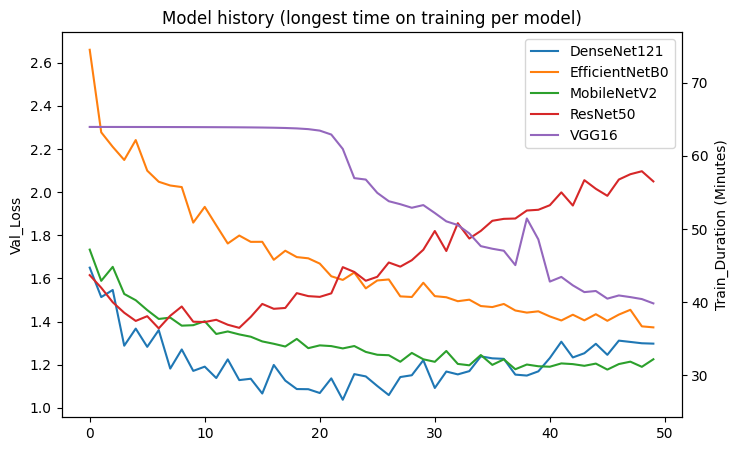

In [34]:
plot_history(tmp, max_train_duration_idx, 'Model history (longest time on training per model)')

In [35]:
max_f1_score_idx = tmp.groupby(by=['model'])['val_f1'].idxmax().to_dict()
max_f1_score_idx

{'DenseNet121': 78,
 'EfficientNetB0': 118,
 'MobileNetV2': 27,
 'ResNet50': 143,
 'VGG16': 40}

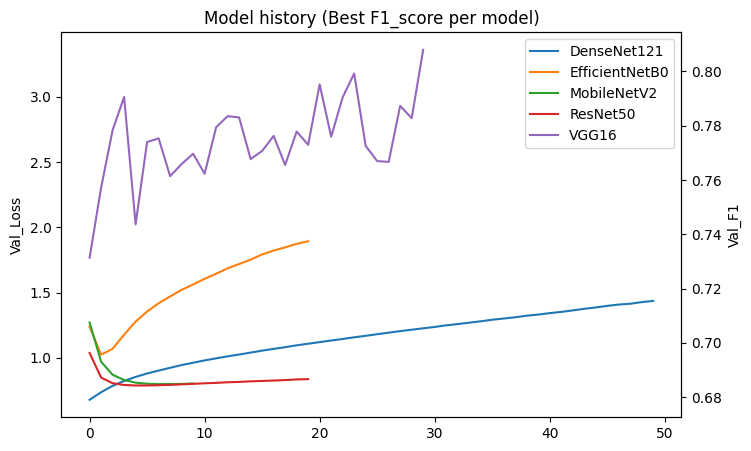

In [36]:
plot_history(tmp, max_f1_score_idx, 'Model history (Best F1_score per model)', metric2='val_f1')

In [37]:
# VGG16, cifar10

tmp = filter_res(df,model=['VGG16'], dataset_name='cifar10')
tmp.head(3)

,model,dataset,batch_size,dropout_rate,epochs,learning_rate,optimizer,val_accuracy,val_f1,val_precision,val_recall,val_auc,objective,train_duration (minutes),model_history
0,VGG16,cifar10,64,0.144,10,0.000603,0,0.192,0.129,0.351,0.192,0.712,0.315,4.65,"{'loss': [2.302553415298462, 2.302508354187011..."
1,VGG16,cifar10,32,0.065,50,0.000711,0,0.460,0.448,0.482,0.460,0.874,0.545,33.45,"{'loss': [2.3024864196777344, 2.30238962173461..."
2,VGG16,cifar10,96,0.258,30,0.000192,0,0.486,0.473,0.479,0.479,0.877,0.559,11.35,"{'loss': [1.9669440984725952, 1.70448136329650..."


In [38]:
corr_df = pd.DataFrame()
coef_df = pd.DataFrame()

In [39]:
bin_edges = {
    'batch_size':[0, 64, 192, 256],
    'learning_rate': [0, 0.0002, 0.0005, 0.001],
    'dropout_rate': [0, 0.1, 0.2, 0.3],
    'epochs': [0, 15, 30, 50]}

In [40]:
def plot_params(data, X, y=METRIC_COL, plot_kind='scatterplot', hue='learning_rate'):
    """
    Plot relationships between hyperparameters and a target metric.

    Parameters:
    data (pd.DataFrame): DataFrame containing data for plotting.
    X (str): Name of the x-axis variable (hyperparameter).
    y (str): Name of the y-axis variable (target metric) (default: METRIC_COL).
    plot_kind (str): Type of plot to create (default: 'scatterplot').
    hue (str): Variable to differentiate groups (default: 'learning_rate').
    """
    data = data.copy()
    bin_labels = ['low', 'medium', 'high']

    # Binning hue column
    if hue != 'optimizer':
        data[hue] = pd.cut(data[hue], bins=bin_edges.get(hue, []), labels=bin_labels)

    # Convert optimizer back to text value
    data['optimizer'] = data['optimizer'].replace({0: 'sgd', 1: 'adam'})

    fig, ax = plt.subplots(figsize=(8, 6))
    getattr(sns, plot_kind)(x=X, y=y, data=data, ax=ax, hue=hue)
    plt.show()

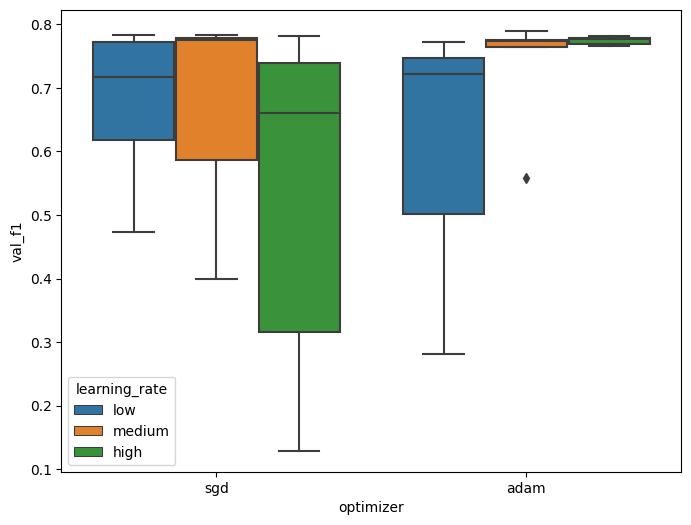

In [42]:
plot_params(tmp, 'optimizer', plot_kind='boxplot')

In [43]:
res = statistical_analysis(data = tmp[[METRIC_COL]+hyperparams], target_col=METRIC_COL, model='VGG16', dataset='cifar10')

In [44]:
corr_df = pd.concat([corr_df, pd.DataFrame(res['corr'], index=[res['model'] + '_' + res['dataset'] ])])
coef_df = pd.concat([coef_df, pd.DataFrame(res['coef'], index=[res['model'] + '_' + res['dataset'] ])])

In [45]:
corr_df

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
VGG16_cifar10,0.157364,-0.215882,0.237954,-0.131176,0.312241


In [46]:
coef_df

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
VGG16_cifar10,0.171567,0.360105,0.370819,0.363879,0.346805


In [47]:
for model_name in model_names:
    # break out of loop because VGG16 has been analyzed above
    if model_name == 'VGG16': continue

    # filter the dataset
    tmp = filter_res(df, model=[model_name], dataset_name='cifar10')

    # get result of statistical analysis
    res = statistical_analysis(data = tmp[[METRIC_COL]+hyperparams], target_col=METRIC_COL, model=model_name, dataset='cifar10')


    # store results in dataframe
    corr_df = pd.concat([corr_df, pd.DataFrame(res['corr'], index=[res['model'] + '_' + res['dataset'] ])])
    coef_df = pd.concat([coef_df, pd.DataFrame(res['coef'], index=[res['model'] + '_' + res['dataset'] ])])

In [48]:
display(corr_df)

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
VGG16_cifar10,0.157364,-0.215882,0.237954,-0.131176,0.312241
MobileNetV2_cifar10,0.209024,-0.009227,0.035769,-0.130547,0.166225
DenseNet121_cifar10,0.280103,0.049096,0.046963,-0.113043,0.148136
EfficientNetB0_cifar10,0.240094,0.009540,0.088151,-0.129211,0.211410
ResNet50_cifar10,0.266714,-0.016044,0.000186,-0.105797,0.215018


In [51]:
import matplotlib.pyplot as plt

def plot_res_data(data, title):
    """
    Plot results data as a horizontal bar chart.

    Parameters:
    data (pd.DataFrame): DataFrame containing data for plotting.
    title (str): Title for the plot.
    """
    data = data.copy()
    fig, ax = plt.subplots(figsize=(9, 4))
    data.plot(kind='barh', ax=ax)
    plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1))
    plt.title(title)
    plt.show()


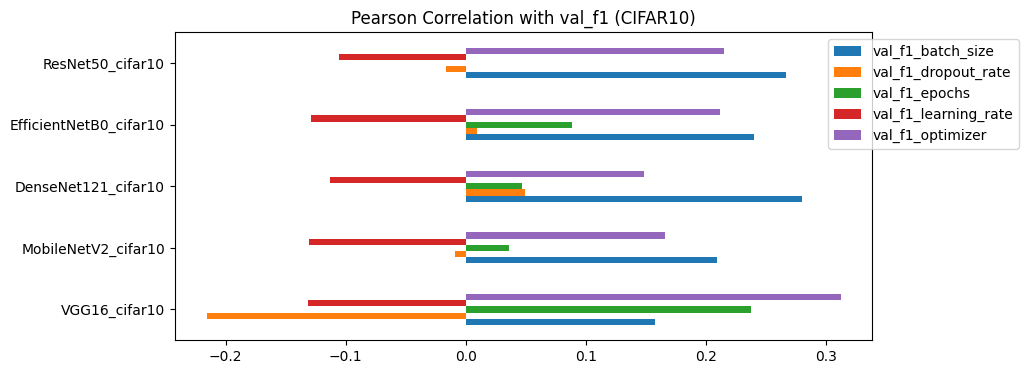

In [52]:
plot_res_data(corr_df, 'Pearson Correlation with {} (CIFAR10)'.format(METRIC_COL))

In [53]:
coef_df

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
VGG16_cifar10,0.171567,0.360105,0.370819,0.363879,0.346805
MobileNetV2_cifar10,0.194083,0.597235,0.217571,0.440367,0.311039
DenseNet121_cifar10,0.223526,0.607353,0.212449,0.423435,0.290643
EfficientNetB0_cifar10,0.181481,0.616107,0.241133,0.462635,0.322232
ResNet50_cifar10,0.237671,0.579122,0.171171,0.418475,0.331110


### CIFAR100

In [54]:
corr_df1 = pd.DataFrame()
coef_df1 = pd.DataFrame()

In [55]:
for model_name in model_names:
    # filter the dataset
    tmp = filter_res(df, model=[model_name], dataset_name='cifar100')

    # get result of statistical analysis
    res = statistical_analysis(data = tmp[[METRIC_COL]+hyperparams], target_col=METRIC_COL, model=model_name, dataset='cifar100')

    # store results in dataframe
    corr_df1 = pd.concat([corr_df1, pd.DataFrame(res['corr'], index=[res['model'] + '_' + res['dataset'] ])])
    coef_df1 = pd.concat([coef_df1, pd.DataFrame(res['coef'], index=[res['model'] + '_' + res['dataset'] ])])

display(corr_df1)

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
MobileNetV2_cifar100,0.000635,-0.034671,0.182514,-0.240901,0.332877
VGG16_cifar100,-0.030972,-0.077196,0.293776,0.178887,0.223582
DenseNet121_cifar100,0.136175,-0.040803,0.200511,-0.182352,0.366238
EfficientNetB0_cifar100,0.108595,0.033710,0.200819,-0.213560,0.485002
ResNet50_cifar100,0.112081,-0.073062,0.159799,-0.211445,0.374340


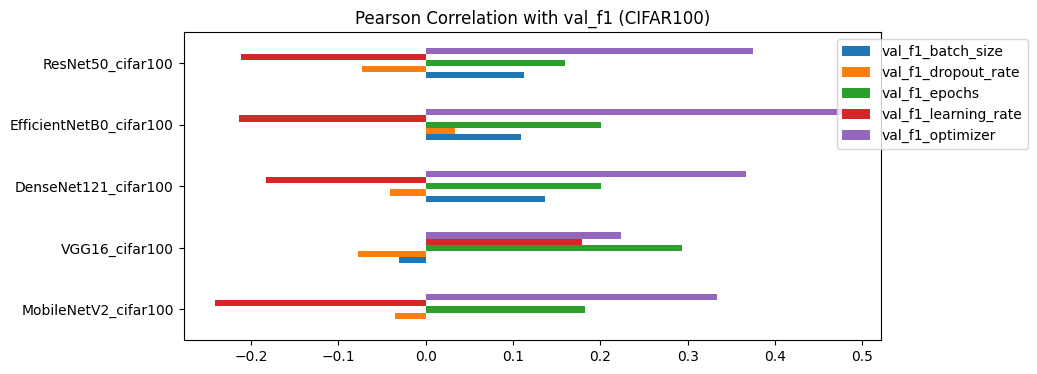

In [56]:
plot_res_data(corr_df1, 'Pearson Correlation with {} (CIFAR100)'.format(METRIC_COL))

In [57]:
coef_df1

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
MobileNetV2_cifar100,0.034148,0.572498,0.281035,0.392171,0.368228
VGG16_cifar100,-0.190503,-0.035871,0.262892,0.289572,0.163588
DenseNet121_cifar100,0.102472,0.536197,0.271845,0.378693,0.360979
EfficientNetB0_cifar100,0.055987,0.577165,0.235845,0.341019,0.417107
ResNet50_cifar100,0.102336,0.527550,0.257381,0.359411,0.380004


# TPESampler

In [58]:
base_path1 = "/content/drive/MyDrive/hyperparameter analysis/hyperparameter_tuning_studies/TPESampler"

In [59]:
def preprocess_experiment_data(base_path, datasets, model_names):
    """
    Preprocess experimental results data.

    Parameters:
    base_path (str): Base path for experiment data files.
    datasets (list): List of dataset names.
    model_names (list): List of model names.

    Returns:
    pd.DataFrame: Preprocessed results data.
    """
    data_list = []  # list of pandas dataframes containing results of experiments

    # Iterate through datasets and model names
    for dataset in datasets:
        for model_name in model_names:
            tmp = pd.read_csv(os.path.join(base_path, "{}_{}_study.csv".format(dataset, model_name)), converters={'params_optimizer': clean_params_optimizer})
            tmp['dataset'] = dataset
            tmp['model'] = model_name
            data_list.append(tmp)

    data = pd.concat(data_list)
    data.reset_index(drop=True, inplace=True)

    # Rename value column to objective
    data.rename({'value': 'objective'}, axis=1, inplace=True)

    # Convert columns to appropriate datetime datatype
    for col in ['datetime_start', 'datetime_complete']:
        data[col] = pd.to_datetime(data[col])

    data['train_duration (minutes)'] = np.round(((data['datetime_complete'] - data['datetime_start']).dt.seconds) / 60, 2)

    cols_to_drop = ['number', 'datetime_start', 'datetime_complete', 'duration', 'state']
    data.drop(columns=cols_to_drop, inplace=True)

    new_columns = data['val_metrics'].apply(extract_metrics)
    data = pd.concat([data, new_columns], axis=1)
    data.drop('val_metrics', axis=1, inplace=True)

    data.columns = data.columns.str.replace('params_', '')

    # Convert values in specific columns to a certain number of decimal places
    for col in ['val_accuracy', 'val_f1', 'val_precision', 'val_recall', 'val_auc', 'objective', 'dropout_rate']:
        data[col] = np.round(data[col], 3)

    # Convert learning_rate to a specific number of decimal places
    data['learning_rate'] = np.round(data['learning_rate'], 6)

    data = data[['model', 'dataset', 'batch_size', 'dropout_rate', 'epochs', 'learning_rate',
             'optimizer', 'val_accuracy', 'val_f1', 'val_precision', 'val_recall', 'val_auc', 'objective',
             'train_duration (minutes)', 'model_history']]

    return data


In [60]:
df1 = preprocess_experiment_data(base_path1, datasets, model_names)
df1.head()

,model,dataset,batch_size,dropout_rate,epochs,learning_rate,optimizer,val_accuracy,val_f1,val_precision,val_recall,val_auc,objective,train_duration (minutes),model_history
0,MobileNetV2,cifar10,64,0.144,10,0.000603,sgd,0.371,0.361,0.417,0.371,0.839,0.472,3.82,"{'loss': [2.4003992080688477, 2.09355020523071..."
1,MobileNetV2,cifar10,32,0.065,50,0.000711,sgd,0.599,0.585,0.599,0.583,0.917,0.657,27.70,"{'loss': [1.6568608283996582, 1.56649267673492..."
2,MobileNetV2,cifar10,96,0.258,30,0.000192,sgd,0.613,0.602,0.602,0.602,0.913,0.666,9.43,"{'loss': [1.5279393196105957, 0.96746677160263..."
3,MobileNetV2,cifar10,96,0.158,20,0.000148,adam,0.594,0.581,0.589,0.581,0.905,0.650,6.78,"{'loss': [0.7753976583480835, 0.70308595895767..."
4,MobileNetV2,cifar10,160,0.164,10,0.000519,sgd,0.605,0.605,0.605,0.605,0.900,0.664,3.05,"{'loss': [1.4450337886810303, 0.67597830295562..."


### Analysis

### cifar10

In [61]:
corr_df2 = pd.DataFrame()
coef_df2 = pd.DataFrame()

In [62]:
for model_name in model_names:
    # filter the dataset
    tmp = filter_res(df1, model=[model_name], dataset_name='cifar10')

    # get result of statistical analysis
    res = statistical_analysis(data = tmp[[METRIC_COL]+hyperparams], target_col=METRIC_COL, model=model_name, dataset='cifar10')

    # store results in dataframe
    corr_df2 = pd.concat([corr_df2, pd.DataFrame(res['corr'], index=[res['model'] + '_' + res['dataset'] ])])
    coef_df2 = pd.concat([coef_df2, pd.DataFrame(res['coef'], index=[res['model'] + '_' + res['dataset'] ])])

display(corr_df2)

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
MobileNetV2_cifar10,0.446510,-0.218675,0.502749,-0.173787,-0.093676
VGG16_cifar10,0.281728,0.172989,0.204325,0.055888,0.121117
DenseNet121_cifar10,0.400754,0.547282,-0.035699,-0.495723,0.327628
EfficientNetB0_cifar10,0.368367,0.429277,-0.015379,-0.462933,0.455710
ResNet50_cifar10,0.163430,-0.247524,0.268849,-0.198332,0.119202


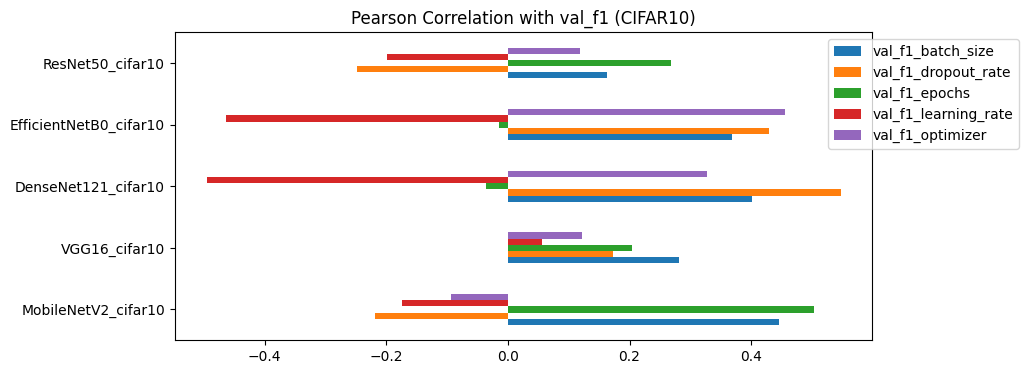

In [63]:
plot_res_data(corr_df2, 'Pearson Correlation with {} (CIFAR10)'.format(METRIC_COL))

In [64]:
coef_df2

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
MobileNetV2_cifar10,0.237279,0.459371,0.564904,0.223283,-0.013420
VGG16_cifar10,0.400923,0.439240,0.589334,0.089450,0.129841
DenseNet121_cifar10,-0.073015,0.984649,0.060500,0.408129,0.087192
EfficientNetB0_cifar10,-0.140589,0.947037,0.218046,0.399850,0.188039
ResNet50_cifar10,0.174674,0.467104,0.713375,0.302020,-0.019082


### cifar100

In [65]:
corr_df3 = pd.DataFrame()
coef_df3 = pd.DataFrame()

In [66]:
for model_name in model_names:
    # filter the dataset
    tmp = filter_res(df1, model=[model_name], dataset_name='cifar100')

    # get result of statistical analysis
    res = statistical_analysis(data = tmp[[METRIC_COL]+hyperparams], target_col=METRIC_COL, model=model_name, dataset='cifar100')

    # store results in dataframe
    corr_df3 = pd.concat([corr_df3, pd.DataFrame(res['corr'], index=[res['model'] + '_' + res['dataset'] ])])
    coef_df3 = pd.concat([coef_df3, pd.DataFrame(res['coef'], index=[res['model'] + '_' + res['dataset'] ])])

display(corr_df3)

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
MobileNetV2_cifar100,0.220337,0.512082,0.438015,-0.560674,0.702372
VGG16_cifar100,0.428634,0.584200,0.511893,0.443848,0.315198
DenseNet121_cifar100,0.321029,-0.551589,0.430114,0.275002,0.517769
EfficientNetB0_cifar100,0.176096,0.504170,0.232434,-0.199748,0.743414
ResNet50_cifar100,0.483782,0.472078,0.030523,-0.465424,0.717289


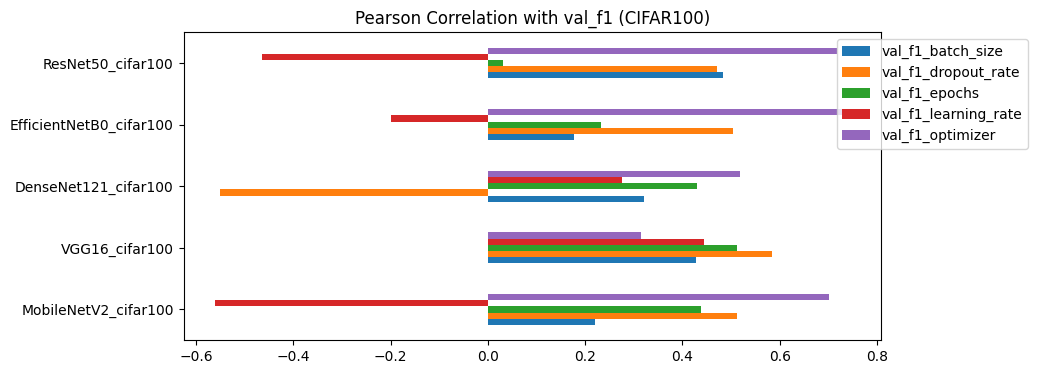

In [67]:
plot_res_data(corr_df3, 'Pearson Correlation with {} (CIFAR100)'.format(METRIC_COL))

In [68]:
coef_df3

,val_f1_batch_size,val_f1_dropout_rate,val_f1_epochs,val_f1_learning_rate,val_f1_optimizer
MobileNetV2_cifar100,-0.224120,0.488402,0.372081,0.345108,0.357351
VGG16_cifar100,0.040692,0.572910,0.395781,-0.130584,-0.005473
DenseNet121_cifar100,0.037277,0.208686,0.448232,0.538067,0.213066
EfficientNetB0_cifar100,-0.323094,0.598646,0.315725,0.218768,0.313489
ResNet50_cifar100,0.034912,0.494510,0.144483,0.180958,0.445758


References
* “tf.keras.optimizers.Optimizer | TensorFlow v2.13.0,” TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer 
* How to Append Pandas DataFrame to Existing CSV File?,” GeeksforGeeks, Nov. 25, 2021. https://www.geeksforgeeks.org/how-to-append-pandas-dataframe-to-existing-csv-file/
* “Python - SKLearn MinMaxScaler - scale specific columns only,” www.includehelp.com. https://www.includehelp.com/python/sklearn-minmaxscaler-scale-specific-columns-only.aspx 
* “Table Visualization — pandas 1.5.2 documentation,” pandas.pydata.org. https://pandas.pydata.org/docs/user_guide/style.html
